In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pickle
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data = unpickle('data_batch_3')

In [4]:
data_x = data[b'data']
data_y = data[b'labels']

In [5]:
data_x = np.array(data_x)
data_y = np.array(data_y)
data_y = np.reshape(data_y,(-1,1))
print(data_x.shape,data_y.shape)
data = np.concatenate((data_x,data_y),axis=1)
print(data.shape)        

(10000, 3072) (10000, 1)
(10000, 3073)


In [6]:
d = []
for i in range(10):
    c = 0
    for j in range(10000):
        if (c>=500):
            break
        if (data[j][-1]==i):
            d.append(data[j])
            c+=1
d = np.array(d)
np.random.shuffle(d)

In [7]:
data_x = d[:,:-1]
data_y = d[:,-1]

print(data_x.shape,data_y.shape)

(5000, 3072) (5000,)


In [8]:
train_x = []
train_y = []
val_x = []
val_y = []
print(data_x.shape,data_y.shape)
s = 1000
for i in range(5):
    x = np.vstack((data_x[0:i*s],data_x[(i+1)*s:5000]))
    y = np.append(data_y[0:i*s],data_y[(i+1)*s:5000])
    vx = data_x[i*s:(i+1)*s]
    vy = data_y[i*s:(i+1)*s]
    train_x.append(x)
    train_y.append(y)
    val_x.append(vx)
    val_y.append(vy)

(5000, 3072) (5000,)


Coef= [[ 3.97759735e-04  3.83648692e-04  9.35668400e-06 ...  3.15710064e-06
   7.14845774e-06  3.10277460e-04]
 [ 5.58590984e-04  4.98897298e-04 -3.66291381e-04 ... -7.86765753e-05
   5.79419265e-05 -3.54737663e-04]
 [-3.11543483e-04 -1.42458268e-04  3.15772970e-04 ...  1.21511712e-03
   4.36861334e-04  7.40485630e-04]
 ...
 [-9.50739017e-05 -7.32042812e-04 -6.29709907e-04 ... -5.01681917e-04
  -5.22389276e-04 -5.17746651e-04]
 [ 5.38583125e-04  5.94882568e-05 -3.54301897e-04 ... -9.88141910e-04
  -3.29481493e-04  5.47138054e-05]
 [ 5.63979539e-04  8.29402155e-04  5.51047532e-05 ... -5.43202571e-04
   7.08128759e-05  1.15516178e-03]]
Confusion Martix= [[42  6 11  3  5  4  4  6 18 10]
 [ 5 53  6  2  4  5  4  7 11 20]
 [10  2 26 12 15  9  9 15  1  1]
 [10  7 10 24  4 18  5  8  9  6]
 [ 5  1 13 10 33  6  4 11  1  6]
 [ 9  7 10 11 17 24 11  7  5  1]
 [ 5  7 20 18 10 12 34  1  2  2]
 [ 5  5 18  4 12  6  5 27  2  7]
 [12  6  5  6  4  3  1  5 44  2]
 [ 6 22  2  7  5  1  5  7  8 28]]
0.335


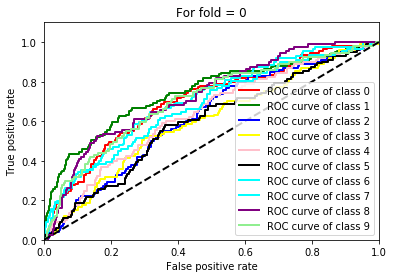

Coef= [[ 3.86214425e-04  1.59031329e-04  1.57107803e-04 ... -3.01885538e-05
   3.59172726e-05  9.49092836e-05]
 [ 1.07939475e-03  2.23061978e-04 -7.78146440e-05 ...  1.64791919e-05
  -7.80989603e-05 -2.51173616e-04]
 [ 6.42104847e-05  3.64402715e-04  4.71260132e-04 ... -7.53208020e-05
   1.05028486e-04  1.28305420e-04]
 ...
 [ 3.14741294e-04 -4.82362681e-04 -4.28900661e-04 ... -6.75984680e-04
  -7.95475071e-04 -5.40131714e-04]
 [ 8.36454296e-04 -4.23272405e-06 -2.01837637e-04 ... -1.20419097e-03
  -6.41249639e-04 -2.15116383e-04]
 [ 1.83074568e-04  7.00298441e-04  2.36277168e-04 ... -2.42973851e-04
   2.68857112e-04  6.33361560e-04]]
Confusion Martix= [[42  5  6  3  5  4  5  5 20  4]
 [ 7 44  5  6  3  4  2  5  9  5]
 [10  5 40 12 16  5  5 10  6  2]
 [ 6  4 11 13 17 17 14  6  4  6]
 [ 1  1 23 12 26 10  9 13  3  0]
 [ 8  5 17 14 11 22  3 14  5  7]
 [ 2  9 21 16  9  9 32  2  3  0]
 [ 8  2 16  7 11  5  3 22  2  5]
 [13 14  3  7  4  1  1  1 60  4]
 [11 18  5  2  1  3  8  5  9 44]]
0.345


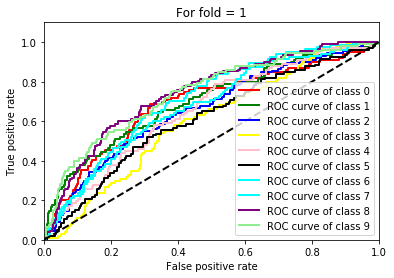

Coef= [[ 3.83918172e-06  7.84764827e-05  2.72806075e-04 ... -1.35145562e-04
   2.10637478e-04  8.48271164e-05]
 [ 3.26835578e-04  3.64759671e-04  2.79113955e-04 ...  4.04871474e-05
   4.13859647e-04  4.93503824e-04]
 [ 5.60052582e-05  2.71778812e-04 -2.40926052e-05 ...  8.92647064e-04
   1.09660126e-03  8.39439962e-04]
 ...
 [-2.10654313e-04 -5.51704582e-04 -6.39584472e-04 ... -8.88970185e-04
  -6.45212508e-04 -5.90076996e-05]
 [ 6.04730049e-04 -9.62379507e-05 -7.39017088e-05 ... -7.44891837e-04
  -4.68301024e-05  8.28986749e-04]
 [ 4.35314470e-04  7.07508711e-04  4.79544737e-04 ...  9.88677311e-05
   5.41896377e-04  1.32851571e-03]]
Confusion Martix= [[43  8 10  3  5  6  3  2  6  5]
 [ 6 32  5  8  5  6  5  4  6 13]
 [ 8  7 26 10 22  7 13  8  3  0]
 [14  5 16 23 13 14 14  2  2  3]
 [ 4  2 32 13 33  9 10  6  3  4]
 [ 8  5 12 12 11 24  7  6  6  2]
 [ 4  6 10  9 12 11 38  3  2  1]
 [ 9  8 12 11 19  8  5 35  4  6]
 [21 10  5  2  2  4  1  1 40  7]
 [14 16  2  4  7  4  3  3 12 29]]
0.323


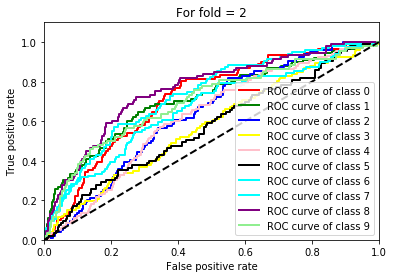

Coef= [[ 4.34122473e-04  4.23975833e-04  1.57620393e-05 ... -2.41249340e-04
  -6.79771484e-05  1.64079779e-04]
 [ 3.76548190e-04  4.88842000e-04 -5.63560715e-05 ... -2.89104382e-04
  -8.99507969e-05  6.19124312e-04]
 [-5.37395829e-04  7.34851345e-05  6.19284906e-04 ... -1.46839322e-04
   1.35885327e-04  4.13866822e-04]
 ...
 [ 3.82146130e-05 -6.74180156e-04 -8.43462273e-04 ... -5.84369645e-04
  -3.95313686e-04 -1.22261931e-04]
 [ 5.35691592e-04 -1.99336688e-04 -4.62394089e-04 ... -1.36899421e-03
  -7.13331114e-04 -1.12699731e-04]
 [ 5.68734051e-04  7.91185613e-04  7.68870196e-07 ... -1.04805567e-04
   6.43410035e-04  1.17087797e-03]]
Confusion Martix= [[52 10  6  7  4  2  3  3 15  6]
 [12 40 10  3  5  3  3  7  9 13]
 [16  3 29  9  9  7  8  3  3  4]
 [ 7  9 25 12 10 11 10  4  6  6]
 [ 7  6 14 17 26  9 10 10  2  2]
 [12  8 10 21 12 20 10  4  4  4]
 [ 5  3 11 20 11  5 21  4  2  4]
 [ 7  8 14  7 16  8  4 30  4  3]
 [24  7  7  5  1  1  2  3 53  5]
 [14 21  6  2  5  3  4  5  3 30]]
0.313


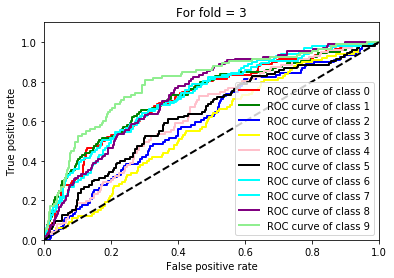

Coef= [[ 1.21206300e-04  5.35088700e-04 -2.00439728e-04 ...  1.55360907e-04
   2.10435200e-04  2.75135084e-04]
 [ 8.46553867e-04  5.09125137e-04 -1.83636302e-04 ...  1.51861648e-04
   2.75439319e-06 -1.74709434e-04]
 [ 1.60161098e-04  4.22198615e-04  1.72510128e-04 ...  9.44584332e-04
   8.46222706e-04  5.54585814e-04]
 ...
 [-1.76836897e-04 -7.77542705e-04 -5.59320735e-04 ... -7.34935700e-04
  -8.70892876e-04 -6.20396584e-04]
 [ 2.01484986e-04 -3.15073394e-04 -4.92423283e-05 ... -1.28167524e-03
  -8.48298437e-04 -5.09298742e-04]
 [ 1.35353911e-04  4.00413241e-04  1.44368559e-04 ... -5.46914803e-05
   3.71680641e-04  4.02768569e-04]]
Confusion Martix= [[39  8  8  7  1  3  1  6 17  3]
 [ 8 40  1  7  3  3  2  3  7 24]
 [12  5 23  8 15  8 11  7  4  1]
 [ 8  4 12 26  5 14 11  7  5  3]
 [ 9  7 14  9 25  7  9 13  0  0]
 [ 6  4 15 14 10 21 13  7  0  4]
 [ 3  3 21 12 12 12 31  7  2  1]
 [ 3  0 19 14 12 10  3 41  2  6]
 [14 12  3  1  2  4  4  2 48 13]
 [14 18  6  6  5  6  5  8 14 34]]
0.328


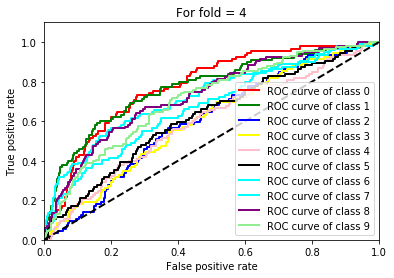

In [12]:
for i in range(5):
    mod = svm.SVC(kernel='linear',gamma='auto',decision_function_shape='ovr',tol=0.01,probability=True)
    x = np.copy(train_x[i])
    y = np.copy(train_y[i])
    test_x = np.copy(val_x[i])
    test_y = np.copy(val_y[i])
    mod.fit(x,y)
    print("Coef=",mod.coef_)
    y_pred = mod.predict(test_x)
    print("Confusion Martix=",confusion_matrix(test_y, y_pred))
    print(mod.score(test_x,test_y))
    mod = svm.SVC(kernel='linear',gamma='auto',decision_function_shape='ovr',tol=0.01)
    y = label_binarize(y,classes=range(10))
    test_y = label_binarize(test_y,classes=range(10))
    out = OneVsRestClassifier(mod).fit(x,y).decision_function(test_x)
    fpr= dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(10):
        fpr[j],tpr[j],t = roc_curve(test_y[:,j],out[:,j])
        roc_auc[j] = auc(fpr[j],tpr[j])
    col = ["red","green","blue","yellow","pink","black","aqua","cyan","purple","lightgreen"]
    for j,c in zip(range(10),col):
        plt.plot(fpr[j],tpr[j],color=c,lw=2,label=("ROC curve of class "+str(j)))
    plt.plot([0,1],[0,1],'k--',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('For fold = '+str(i))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
for i in range(5):
    mod = svm.SVC(kernel='linear',gamma='auto',decision_function_shape='ovo',tol=0.01)
    x = train_x[i]
    y = train_y[i]
    mod.fit(x,y)
    print("Coef=",mod.coef_)
    y_pred = mod.predict(val_x[i])
    print("Confusion Martix=",confusion_matrix(val_y[i], y_pred))
    print(mod.score(val_x[i],val_y[i]))

Confusion Martix= [[46  4  7  3  7  2  2  6 24  8]
 [ 3 60  3  3  2  0  2  5 11 28]
 [11  2 36  6 20  2 10 11  1  1]
 [ 3  3 11 37  9 14 11  5  4  4]
 [ 6  0 18  2 35  4 12  9  2  2]
 [ 6  2 16 17  9 28 11  6  2  5]
 [ 1  3 19 10 12  8 56  0  0  2]
 [ 4  3 12 10  7  7  3 36  3  6]
 [11  2  3  2  4  4  1  2 54  5]
 [ 2 21  0  1  5  2  3  3  7 47]]
0.435


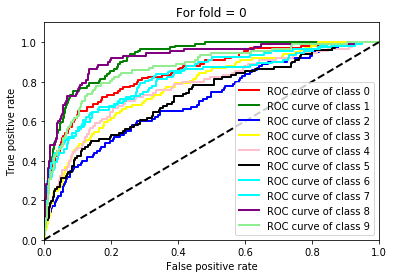

Confusion Martix= [[48  7  3  3  4  3  7  3 15  6]
 [ 2 50  1  8  1  1  4  4  5 14]
 [10  4 38  7 13  7 21  7  3  1]
 [ 6  9  8 33  6 10 15  2  4  5]
 [ 3  1 15  3 39  2 25  5  2  3]
 [ 5  4 10 27 12 27  9  6  5  1]
 [ 3  3 11  9 13  2 57  3  1  1]
 [ 3  0  4 13 12  3  6 30  5  5]
 [ 8 12  2  4  4  3  1  1 62 11]
 [ 5 22  3  2  2  1  3  3 13 52]]
0.436


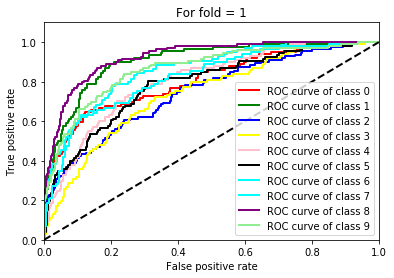

Confusion Martix= [[49  6  4  1  3  5  3  3  7 10]
 [ 3 48  4  4  0  3  4  4  5 15]
 [ 5  1 34  7 22  1 20  6  4  4]
 [ 4  2 11 32 12 24 11  2  2  6]
 [11  3 17  5 42  6 21  5  2  4]
 [ 4  5  9 15  8 26 12  8  4  2]
 [ 1  4  9  3 16  4 57  1  0  1]
 [ 7  6  5 11 21  7  9 42  3  6]
 [10  9  1  4  0  3  0  4 54  8]
 [ 5 17  2  5  2  2  1  1  8 51]]
0.435


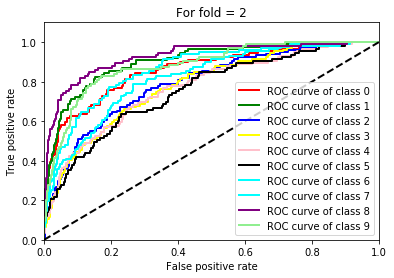

Confusion Martix= [[54  5  6  4  3  0  4  1 21 10]
 [ 9 56  2  3  5  1  3  2  4 20]
 [12  2 34 11 10  3  8  6  2  3]
 [ 1  3 15 35  9 17  9  5  2  4]
 [ 7  1 12  9 33  5 27  4  3  2]
 [ 6  8 12 20  5 38  8  3  2  3]
 [ 5  1  6 13 13  4 40  2  1  1]
 [ 5  5  8 11 11  4  6 39  2 10]
 [11  8  3  2  5  1  2  2 69  5]
 [ 0 21  1  7  7  0  4  7  4 42]]
0.44


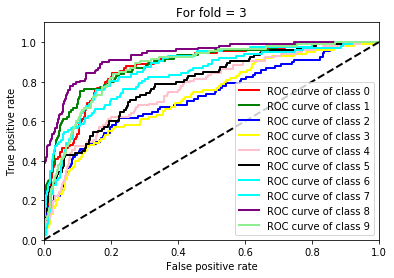

Confusion Martix= [[49  3  5  3  2  1  4  2 21  3]
 [ 5 55  2  4  2  1  1  2 10 16]
 [ 8  3 33  5 17  5 12  4  4  3]
 [ 5  3  7 30 10 13 16  3  2  6]
 [ 5  3 16  8 29  1 14 14  2  1]
 [ 3  3 10 24  6 25 10  8  2  3]
 [ 2  4 10  7  9 10 54  2  1  5]
 [ 2  3 10  9 14  6  8 52  2  4]
 [12 11  2  3  0  3  2  1 59 10]
 [ 8 19  2  2  4  3  2  5 15 56]]
0.442


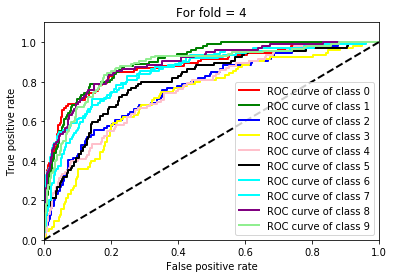

In [14]:
for i in range(5):
    mod = svm.SVC(kernel='rbf',gamma='scale',decision_function_shape='ovr',tol=0.01)
    x = np.copy(train_x[i])
    y = np.copy(train_y[i])
    test_x = np.copy(val_x[i])
    test_y = np.copy(val_y[i])
    mod.fit(x,y)
    y_pred = mod.predict(test_x)
    print("Confusion Martix=",confusion_matrix(test_y, y_pred))
    print(mod.score(test_x,test_y))
    mod = svm.SVC(kernel='rbf',gamma='scale',decision_function_shape='ovr',tol=0.01)
    y = label_binarize(y,classes=range(10))
    test_y = label_binarize(test_y,classes=range(10))
    out = OneVsRestClassifier(mod).fit(x,y).decision_function(test_x)
    fpr= dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(10):
        fpr[j],tpr[j],t = roc_curve(test_y[:,j],out[:,j])
        roc_auc[j] = auc(fpr[j],tpr[j])
    col = ["red","green","blue","yellow","pink","black","aqua","cyan","purple","lightgreen"]
    for j,c in zip(range(10),col):
        plt.plot(fpr[j],tpr[j],color=c,lw=2,label=("ROC curve of class "+str(j)))
    plt.plot([0,1],[0,1],'k--',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('For fold = '+str(i))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
for i in range(5):
    mod = svm.SVC(kernel='rbf',gamma='scale',decision_function_shape='ovo',tol=0.01)
    x = train_x[i]
    y = train_y[i]
    mod.fit(x,y)
    print(mod.score(val_x[i],val_y[i]))

Confusion Martix= [[50  7 10  3  8  7  2  5 12  5]
 [ 2 49  9  2  2  2  5  6 12 28]
 [ 9  2 32  7 14  9 13 10  3  1]
 [ 5  3 15 36  4 16 13  3  4  2]
 [ 5  2 15  5 34  7  9  8  0  5]
 [ 3  1 19 18 14 27 13  4  3  0]
 [ 1  3 20 15 11  4 52  2  1  2]
 [ 5  2 13  6 11 10  3 33  1  7]
 [11  3  3  5  7  3  3  4 46  3]
 [ 5 20  4  3  4  4  5  3  4 39]]
0.398


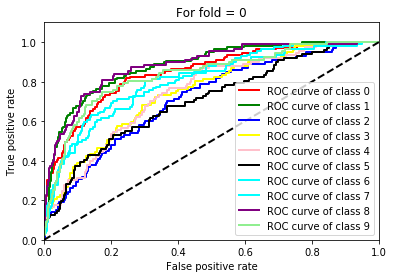

Confusion Martix= [[48  4  6  7  3  2  7  6 12  4]
 [ 8 48  2 10  0  1  2  2  7 10]
 [11  1 31  9 19  7 21  6  5  1]
 [ 6  2  7 27  9 14 22  3  3  5]
 [ 2  2 16  6 34  3 24  8  1  2]
 [ 3  2 12 33 14 23  6  8  2  3]
 [ 2  6  9 11 13  0 59  2  1  0]
 [ 8  0 12  8 13  1  9 24  2  4]
 [11 14  2  3  4  1  2  1 66  4]
 [ 9 20  7  2  1  0  5  5  9 48]]
0.408


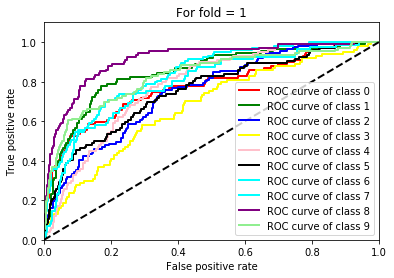

Confusion Martix= [[51  6 10  3  0  3  4  2  5  7]
 [ 4 38  4  5  2  2  8  4 10 13]
 [ 7  0 45  6 13  4 18  6  3  2]
 [ 5  5  9 37  7 21 16  2  2  2]
 [10  1 21  4 56  2 14  2  0  6]
 [ 3  3 12 14 14 24 13  4  5  1]
 [ 1  5 11  6 13  4 54  2  0  0]
 [ 9  3  9  9 27  8  7 38  2  5]
 [13  6  4  5  2  2  0  1 54  6]
 [ 3 18  4  4  1  4  5  3 12 40]]
0.437


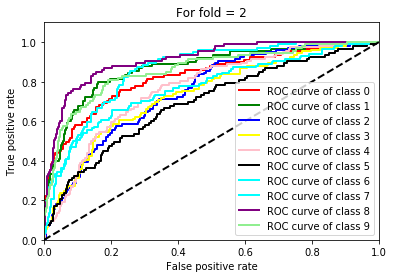

Confusion Martix= [[62  8  6  6  5  1  1  0 12  7]
 [ 7 55  6  4  4  1  4  2  7 15]
 [10  1 37 10 12  3 12  3  0  3]
 [ 2  1 21 28  9 15 12  3  5  4]
 [ 8  2 11 10 26  8 27  6  2  3]
 [ 7  4 20 22  8 24 11  2  3  4]
 [ 3  1  7 19 11  6 35  3  1  0]
 [ 5  3 13  7 13  6  8 37  2  7]
 [18  9  4  4  0  0  2  3 63  5]
 [ 7 19  5  5  5  0  5  7  2 38]]
0.405


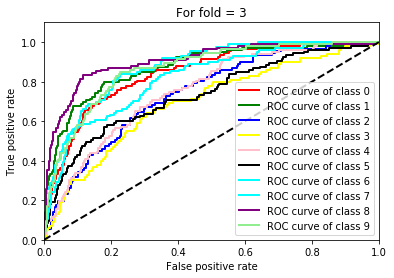

Confusion Martix= [[55  4  6  3  1  1  6  2 10  5]
 [ 7 52  2  3  2  0  6  1  9 16]
 [10  6 25  5 17 11 12  2  6  0]
 [ 2  4  9 24  9 14 20  4  4  5]
 [ 4  6 15  5 28  5 12 16  2  0]
 [ 4  4  9 25  6 26 13  6  0  1]
 [ 1  1 12 12 12 10 51  2  1  2]
 [ 3  2 11  7 21  8  6 47  2  3]
 [11 10  2  4  1  3  2  2 57 11]
 [13 18  3  6  3  5  1  6  9 52]]
0.417


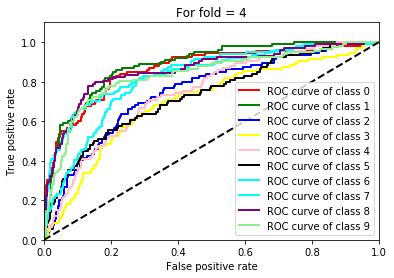

In [15]:
for i in range(5):
    mod = svm.SVC(kernel='poly',gamma='scale',degree=2,decision_function_shape='ovr',tol=0.01)
    x = np.copy(train_x[i])
    y = np.copy(train_y[i])
    test_x = np.copy(val_x[i])
    test_y = np.copy(val_y[i])
    mod.fit(x,y)
    y_pred = mod.predict(test_x)
    print("Confusion Martix=",confusion_matrix(test_y, y_pred))
    print(mod.score(test_x,test_y))
    mod = svm.SVC(kernel='poly',gamma='scale',degree=2,decision_function_shape='ovr',tol=0.01)
    y = label_binarize(y,classes=range(10))
    test_y = label_binarize(test_y,classes=range(10))
    out = OneVsRestClassifier(mod).fit(x,y).decision_function(test_x)
    fpr= dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(10):
        fpr[j],tpr[j],t = roc_curve(test_y[:,j],out[:,j])
        roc_auc[j] = auc(fpr[j],tpr[j])
    col = ["red","green","blue","yellow","pink","black","aqua","cyan","purple","lightgreen"]
    for j,c in zip(range(10),col):
        plt.plot(fpr[j],tpr[j],color=c,lw=2,label=("ROC curve of class "+str(j)))
    plt.plot([0,1],[0,1],'k--',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('For fold = '+str(i))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
for i in range(5):
    mod = svm.SVC(kernel='poly',gamma='scale',degree=2,decision_function_shape='ovo',tol=0.01)
    x = train_x[i]
    y = train_y[i]
    mod.fit(x,y)
    print(mod.score(val_x[i],val_y[i]))